In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
        ])
trainset = torchvision.datasets.MNIST(root = './MNIST', train = True, 
                                       download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root = './MNIST', train = False, 
                                       download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

classes = ('0','1','2','3','4','5','6','7','8','9')

In [3]:

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
print(labels.size())

torch.Size([64, 1, 28, 28])
torch.Size([64])


0


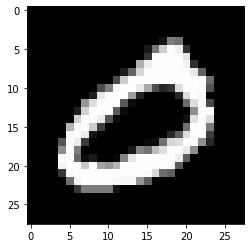

In [4]:
import matplotlib.pyplot as plt

plt.imshow(images[1].numpy().squeeze(), cmap = "gray")

print(classes[labels[1]])

In [5]:
# Mạng LeNet5
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, (5,5)) # input : 28x28x1, output : 28x28x6
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2) # output : 14x14x6
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

In [6]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.1)


In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu5): ReLU()
)

In [8]:
num_epochs = 10
num_steps = len(trainloader)

for epoch in range(num_epochs): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
    # get the inputs, data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if (i + 1) % 500 == 0:
            print("Epoch {}/{} - Step: {}/{} - Loss: {:.4f}".format(
                    epoch, num_epochs, i, num_steps, running_loss / (i + 1)))
print('Finished Training')

Epoch 0/10 - Step: 499/938 - Loss: 2.2824
Epoch 1/10 - Step: 499/938 - Loss: 0.7373
Epoch 2/10 - Step: 499/938 - Loss: 0.2260
Epoch 3/10 - Step: 499/938 - Loss: 0.1595
Epoch 4/10 - Step: 499/938 - Loss: 0.1232
Epoch 5/10 - Step: 499/938 - Loss: 0.1016
Epoch 6/10 - Step: 499/938 - Loss: 0.0916
Epoch 7/10 - Step: 499/938 - Loss: 0.0831
Epoch 8/10 - Step: 499/938 - Loss: 0.0760
Epoch 9/10 - Step: 499/938 - Loss: 0.0674
Finished Training


0


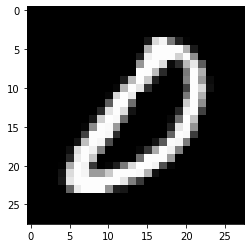

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

plt.imshow(images[1].numpy().squeeze(), cmap = "gray")

images, labels = images.to(device), labels.to(device)
outputs = net(images)

_,  predicted = torch.max(outputs, 1)


print(classes[predicted[1]])